## Part 1 - Calculations

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Define the data points
points = np.array([
    [3, 6],  # A1
    [6, 3],  # A2
    [8, 6],  # A3
    [2, 1],  # A4
    [5, 9]   # A5
])

# Initial centroids (A2 and A4)
initial_centroids = np.array([
    [6, 3],  # C1 (A2)
    [2, 1]   # C2 (A4)
])


In [12]:
# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Assign points to clusters based on distance to initial centroids
cluster_labels = []
for point in points:
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    cluster_labels.append(0 if dist_to_c1 < dist_to_c2 else 1)
cluster_labels = np.array(cluster_labels)

# Calculate new centroids
cluster1_points = points[cluster_labels == 0]
cluster2_points = points[cluster_labels == 1]
new_centroids = np.array([
    np.mean(cluster1_points, axis=0),
    np.mean(cluster2_points, axis=0)
])

print("\nCluster 1 points:", cluster1_points)
print("New centroid 1:", new_centroids[0])
print("\nCluster 2 points:", cluster2_points)
print("New centroid 2:", new_centroids[1])


Cluster 1 points: [[3 6]
 [6 3]
 [8 6]
 [5 9]]
New centroid 1: [5.5 6. ]

Cluster 2 points: [[2 1]]
New centroid 2: [2. 1.]



Clustering Results:
-----------------
Distances from points to initial centroids:

Point A1 (3, 6):
Distance to C1 (A2): 4.24
Distance to C2 (A4): 5.10
Assigned to Cluster: 1

Point A2 (6, 3):
Distance to C1 (A2): 0.00
Distance to C2 (A4): 4.47
Assigned to Cluster: 1

Point A3 (8, 6):
Distance to C1 (A2): 3.61
Distance to C2 (A4): 7.81
Assigned to Cluster: 1

Point A4 (2, 1):
Distance to C1 (A2): 4.47
Distance to C2 (A4): 0.00
Assigned to Cluster: 2

Point A5 (5, 9):
Distance to C1 (A2): 6.08
Distance to C2 (A4): 8.54
Assigned to Cluster: 1

New centroids:
Cluster 1: (5.50, 6.00)
Cluster 2: (2.00, 1.00)


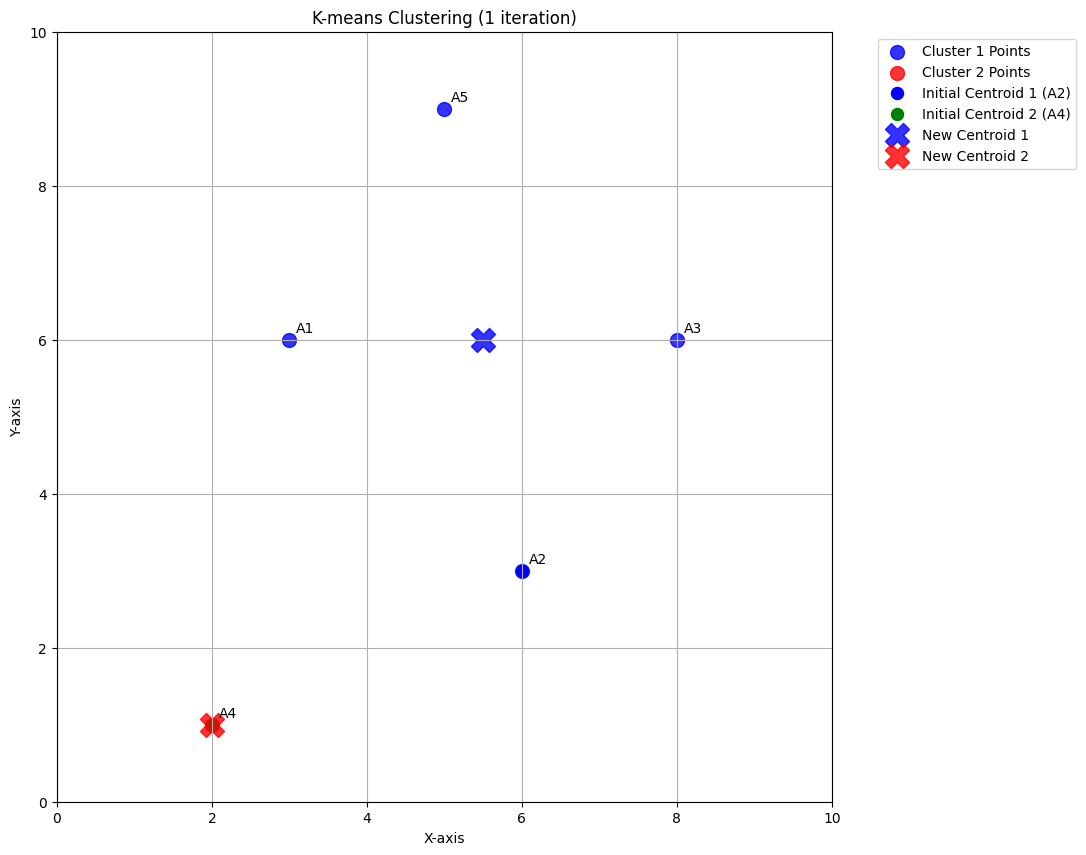

In [13]:
# Create visualization
plt.figure(figsize=(10, 10))
plt.grid(True)

# Plot points for each cluster
plt.scatter(points[cluster_labels == 0][:, 0], points[cluster_labels == 0][:, 1], 
           c='blue', s=100, alpha=0.8, label='Cluster 1 Points')
plt.scatter(points[cluster_labels == 1][:, 0], points[cluster_labels == 1][:, 1], 
           c='red', s=100, alpha=0.8, label='Cluster 2 Points')

# Plot initial centroids with squares
plt.scatter(initial_centroids[0:1, 0], initial_centroids[0:1, 1], 
           c='blue', marker='.', s=300, facecolors='none', 
           label='Initial Centroid 1 (A2)')
plt.scatter(initial_centroids[1:2, 0], initial_centroids[1:2, 1], 
           c='green', marker='.', s=300, facecolors='none', 
           label='Initial Centroid 2 (A4)')

# Plot new centroids with stars and slight offset for Cluster 2
plt.scatter(new_centroids[0:1, 0], new_centroids[0:1, 1], 
           c='blue', marker='X', s=300, alpha=0.8,
           label='New Centroid 1')
plt.scatter(new_centroids[1:2, 0], new_centroids[1:2, 1], 
           c='red', marker='X', s=300, alpha=0.8,
           label='New Centroid 2')

# Add point labels
for i, (x, y) in enumerate(points):
    plt.annotate(f'A{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')

# Set plot limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering (1 iteration)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Print results
print("\nClustering Results:")
print("-----------------")
print("Distances from points to initial centroids:")
for i, point in enumerate(points):
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    print(f"\nPoint A{i+1} ({point[0]}, {point[1]}):")
    print(f"Distance to C1 (A2): {dist_to_c1:.2f}")
    print(f"Distance to C2 (A4): {dist_to_c2:.2f}")
    print(f"Assigned to Cluster: {cluster_labels[i] + 1}")

print("\nNew centroids:")
for i, centroid in enumerate(new_centroids):
    print(f"Cluster {i + 1}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

## Part 2 - Programming

In [32]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

In [33]:
'''Split into test-train sets'''

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# Create and train both models
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)  # K = 5

nb_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Make predictions with both models
nb_pred = nb_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)

# Calculate probabilities
nb_prob = nb_model.predict_proba(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)

In [35]:
# Print performance metrics for both models
print("\n=== Naive Bayes Results ===")
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_pred))

print("\n=== KNN Results ===")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

# Save predictions from both models
results_df = pd.DataFrame({
    'Actual': y_test,
    'NB_Predicted': nb_pred,
    'NB_Probability_Class_0': nb_prob[:, 0],
    'NB_Probability_Class_1': nb_prob[:, 1],
    'KNN_Predicted': knn_pred,
    'KNN_Probability_Class_0': knn_prob[:, 0],
    'KNN_Probability_Class_1': knn_prob[:, 1]
})

# Calculate accuracy for both models
nb_accuracy = (nb_pred == y_test).mean()
knn_accuracy = (knn_pred == y_test).mean()

print("\n=== Overall Accuracy ===")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")

# Optional: Find best k for KNN
from sklearn.model_selection import cross_val_score

# Test different k values
k_values = range(1, 21)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_values[np.argmax(k_scores)]
print(f"\nBest k value: {best_k}")


=== Naive Bayes Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.48      0.42       312
           1       0.92      0.89      0.90      2148

    accuracy                           0.83      2460
   macro avg       0.65      0.68      0.66      2460
weighted avg       0.85      0.83      0.84      2460


Confusion Matrix:
[[ 149  163]
 [ 243 1905]]

=== KNN Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45       312
           1       0.92      0.93      0.92      2148

    accuracy                           0.87      2460
   macro avg       0.69      0.68      0.68      2460
weighted avg       0.86      0.87      0.86      2460


Confusion Matrix:
[[ 134  178]
 [ 154 1994]]

=== Overall Accuracy ===
Naive Bayes Accuracy: 0.8350
KNN Accuracy: 0.8650

Best k value: 15


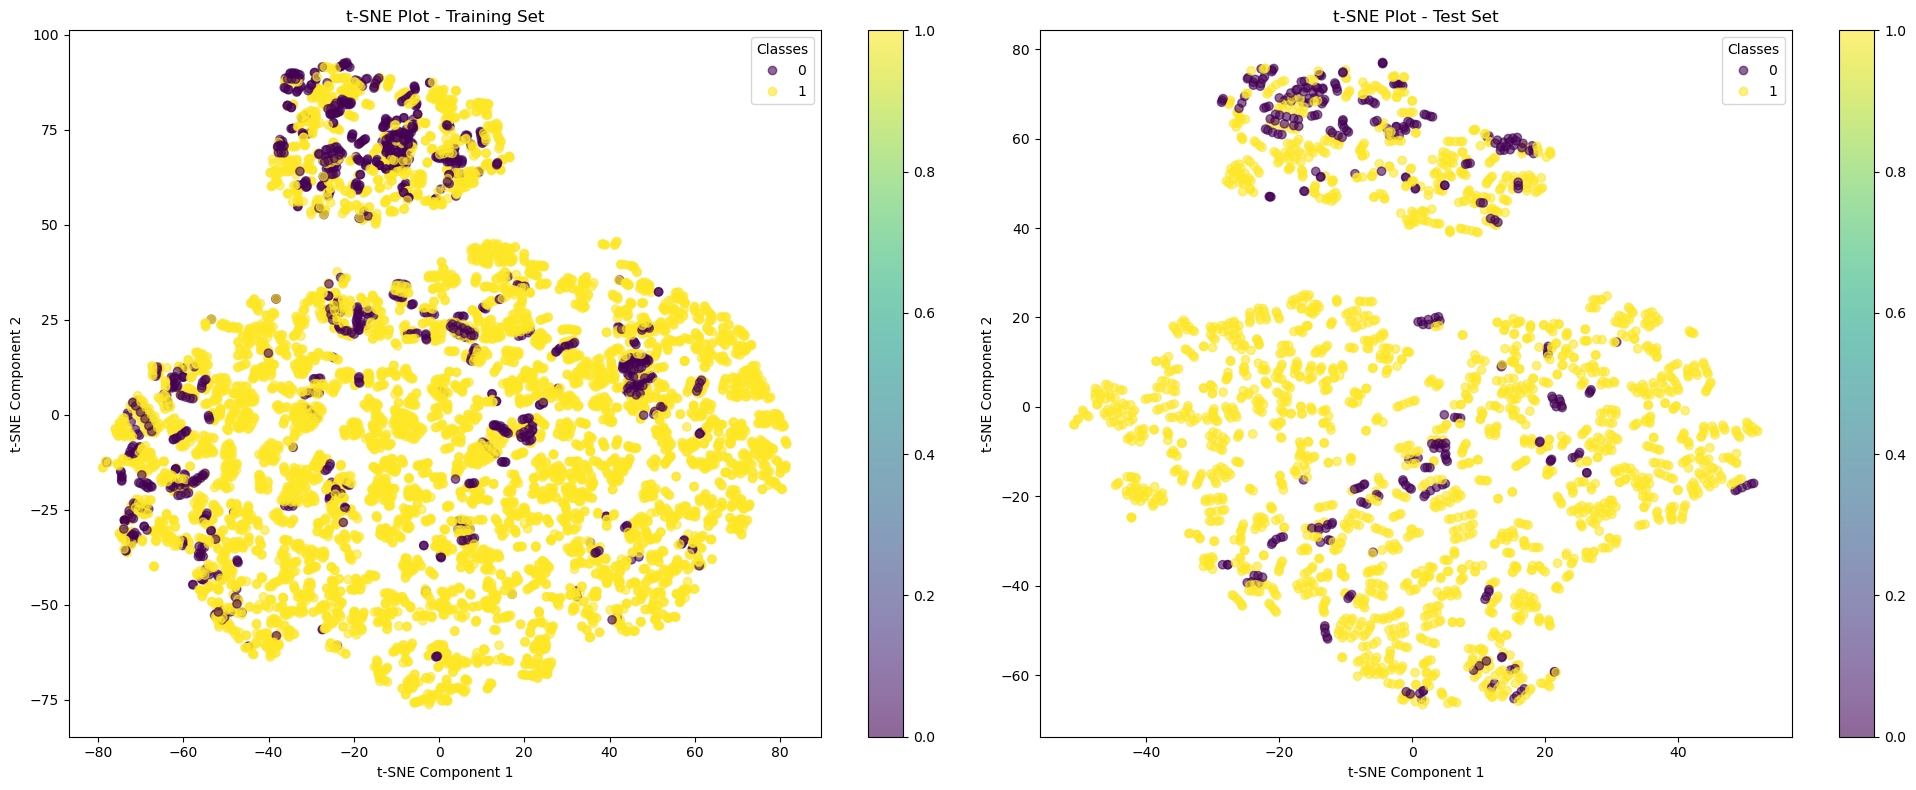

<Figure size 640x480 with 0 Axes>

In [44]:
'''TSNE plots'''

# Create t-SNE objects
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

# Fit and transform training data
tsne_train = tsne.fit_transform(X_train_scaled)

# Transform test data
tsne_test = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X_test_scaled)

# Create figure with two subplots
plt.figure(figsize=(20, 8))

# Plot training data
plt.subplot(1, 2, 1)
scatter_train = plt.scatter(tsne_train[:, 0], tsne_train[:, 1], 
                          c=y_train, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot - Training Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_train)
plt.legend(*scatter_train.legend_elements(), title="Classes")

# Plot test data
plt.subplot(1, 2, 2)
scatter_test = plt.scatter(tsne_test[:, 0], tsne_test[:, 1], 
                         c=y_test, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot - Test Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_test)
plt.legend(*scatter_test.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

# Optional: Save the plot
plt.savefig('tsne_plots.png', dpi=300, bbox_inches='tight')

## Part 3 - Dimensionality Reduction & Analysis

In [45]:
# PCA and Autoencoder to do dimension reduction
